## Regression

In [161]:
# Intall the required pachages to the environment
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install imbalanced-learn
!pip install matplotlib
!pip install seaborn

In [162]:
#import the requiered libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)

Load the dataset

In [163]:
# Load the dataset
df = pd.read_csv('datasets/diabetes_prediction_dataset.csv')

print(df.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


Pre-processing

In [164]:

#Cleaning the dataset
df_clean = df.drop_duplicates()
df_clean = df_clean[df_clean['age'].apply(lambda x: x.is_integer())]

# Create a copy to avoid modifying the original filtered dataframe
data = df_clean.copy()


In [165]:

# Handle categorical variables
# Gender encoding
le_gender = LabelEncoder()
data['gender'] = le_gender.fit_transform(data['gender'])

# Smoking history encoding - using one-hot encoding
smoking_dummies = pd.get_dummies(data['smoking_history'], prefix='smoking')
data = pd.concat([data.drop('smoking_history', axis=1), smoking_dummies], axis=1)

print (data.head())

   gender   age  hypertension  heart_disease    bmi  HbA1c_level  \
0       0  80.0             0              1  25.19          6.6   
1       0  54.0             0              0  27.32          6.6   
2       1  28.0             0              0  27.32          5.7   
3       0  36.0             0              0  23.45          5.0   
4       1  76.0             1              1  20.14          4.8   

   blood_glucose_level  diabetes  smoking_No Info  smoking_current  \
0                  140         0            False            False   
1                   80         0             True            False   
2                  158         0            False            False   
3                  155         0            False             True   
4                  155         0            False             True   

   smoking_ever  smoking_former  smoking_never  smoking_not current  
0         False           False           True                False  
1         False           Fals

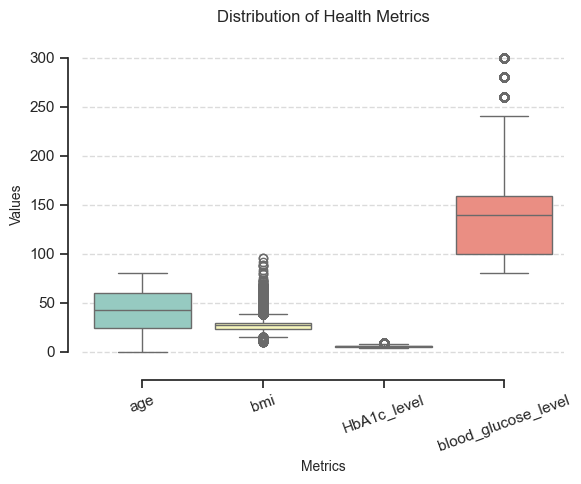

In [166]:
#Create a box plot for neumariacal variables
sns.set_theme(style="ticks", palette="pastel")

plt.figure(figsize=(6, 5))
sns.boxplot(data=df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']], 
            palette="Set3")
plt.title('Distribution of Health Metrics', pad=15, fontsize=12)
plt.ylabel('Values', fontsize=10)
plt.xlabel('Metrics', fontsize=10)
sns.despine(offset=10, trim=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=20)
plt.tight_layout()

plt.show()

In [167]:
# Initialize the scaler
scaler = StandardScaler()

# Numerical columns for scaling
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Scale numerical features
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

Dataset Split

In [168]:

# Split features and target
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)


In [169]:

# Summary of the preprocessing
print("Preprocessing Summary:")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print("\nClass distribution:", pd.Series(y_train).value_counts(normalize=True))

Preprocessing Summary:
Training set shape: (47066, 13)
Testing set shape: (47067, 13)

Class distribution: diabetes
0    0.909892
1    0.090108
Name: proportion, dtype: float64


In [170]:
#Initialize the model
model = LogisticRegression(random_state=42, max_iter=100000)

K-Folds cross validation calculation

In [171]:
# Analyze different k-fold values
results = {
    'k_value': [],
    'mean_accuracy': [],
    'std_accuracy': [],
    'all_scores': []
}

# Calculate dataset size metrics
n_samples = len(X)
min_class_size = min(np.bincount(y))

print(f"Dataset size: {n_samples} samples")
print(f"Minimum class size: {min_class_size} samples")


Dataset size: 94133 samples
Minimum class size: 8482 samples


In [172]:

k_values = list(range(2, 11))

# Perform cross-validation for each k value
for k in k_values:
    cv = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    
    results['k_value'].append(k)
    results['mean_accuracy'].append(scores.mean())
    results['std_accuracy'].append(scores.std())
    results['all_scores'].append(scores)
    
    print(f"\nk={k}:")
    print(f"Mean accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
    print(f"Fold sizes: ~{n_samples // k} samples per fold")



k=2:
Mean accuracy: 0.9581 (+/- 0.0004)
Fold sizes: ~47066 samples per fold

k=3:
Mean accuracy: 0.9580 (+/- 0.0013)
Fold sizes: ~31377 samples per fold

k=4:
Mean accuracy: 0.9581 (+/- 0.0018)
Fold sizes: ~23533 samples per fold

k=5:
Mean accuracy: 0.9581 (+/- 0.0013)
Fold sizes: ~18826 samples per fold

k=6:
Mean accuracy: 0.9580 (+/- 0.0030)
Fold sizes: ~15688 samples per fold

k=7:
Mean accuracy: 0.9581 (+/- 0.0027)
Fold sizes: ~13447 samples per fold

k=8:
Mean accuracy: 0.9581 (+/- 0.0025)
Fold sizes: ~11766 samples per fold

k=9:
Mean accuracy: 0.9581 (+/- 0.0039)
Fold sizes: ~10459 samples per fold

k=10:
Mean accuracy: 0.9581 (+/- 0.0040)
Fold sizes: ~9413 samples per fold


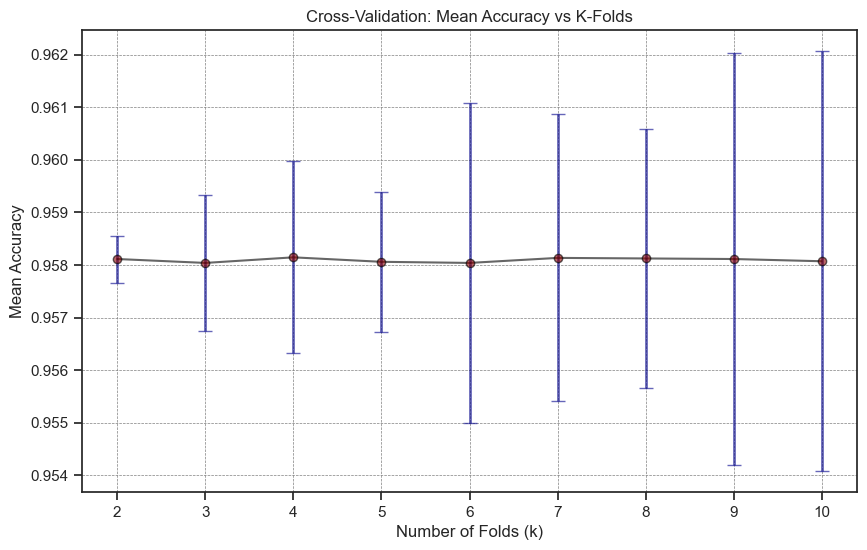

In [173]:
# Plot mean accuracy with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(results['k_value'], results['mean_accuracy'], 
             yerr=[2*std for std in results['std_accuracy']], 
             fmt='o-', capsize=5, color='black', ecolor='darkblue', alpha = 0.6, elinewidth=2, markerfacecolor='darkred')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Mean Accuracy')
plt.title('Cross-Validation: Mean Accuracy vs K-Folds')
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.show()


/var/folders/_g/cgx_xqxd1vlg5wz398x6vc0w0000gn/T/ipykernel_94049/1802357535.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([results['all_scores'][i] for i in range(len(k_values))],


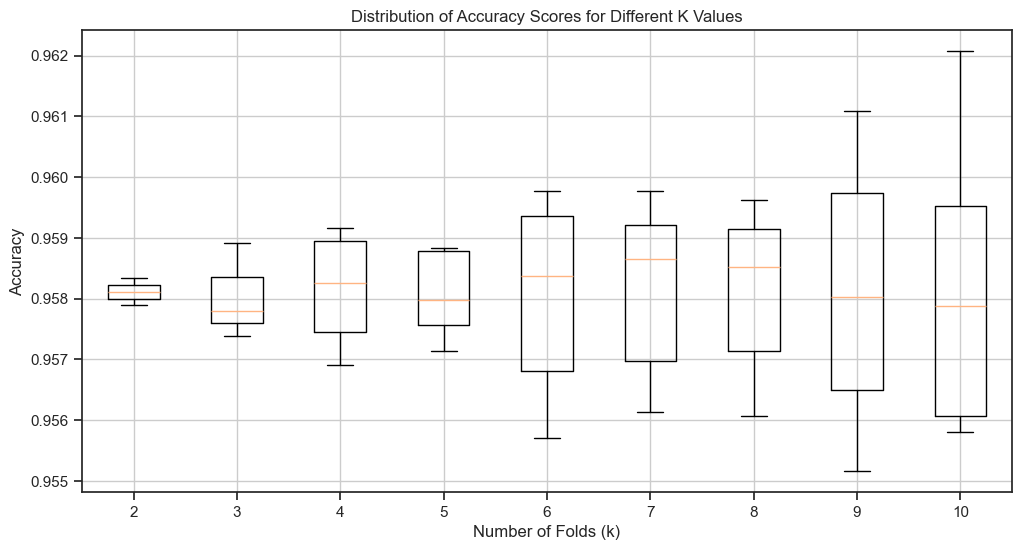

In [174]:

# Plot distribution of scores for each k
plt.figure(figsize=(12, 6))
plt.boxplot([results['all_scores'][i] for i in range(len(k_values))], 
            labels=k_values)
plt.xlabel('Number of Folds (k)')
plt.ylabel('Accuracy')
plt.title('Distribution of Accuracy Scores for Different K Values')
plt.grid(True)
plt.show()


In [175]:

# Find optimal k value
stability_metric = np.array(results['mean_accuracy']) / (np.array(results['std_accuracy']) + 1e-10)
optimal_k_idx = np.argmax(stability_metric)
optimal_k = k_values[optimal_k_idx]

print("\nOptimal k-fold Analysis:")
print(f"Optimal k value: {optimal_k}")
print(f"Mean accuracy: {results['mean_accuracy'][optimal_k_idx]:.4f}")
print(f"Standard deviation: {results['std_accuracy'][optimal_k_idx]:.4f}")


Optimal k-fold Analysis:
Optimal k value: 2
Mean accuracy: 0.9581
Standard deviation: 0.0002


Model training

In [176]:

#Train the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=100000, random_state=42)

In [177]:

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


Model evaluation

In [178]:

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [179]:

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42826
           1       0.87      0.63      0.73      4241

    accuracy                           0.96     47067
   macro avg       0.92      0.81      0.85     47067
weighted avg       0.96      0.96      0.95     47067



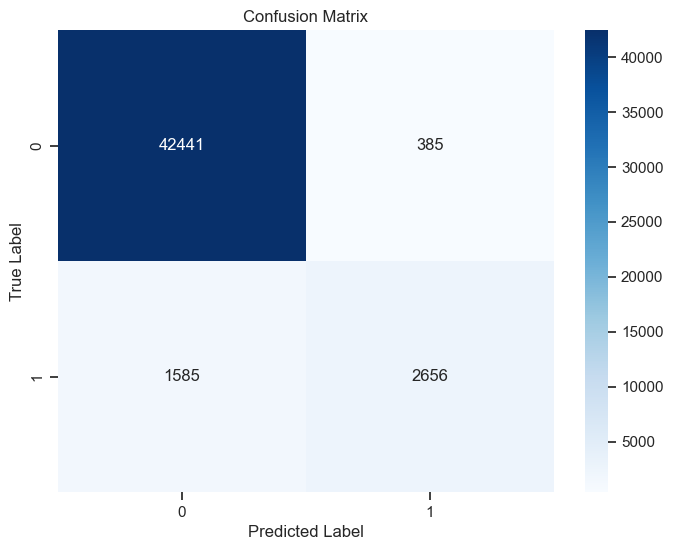

In [180]:

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


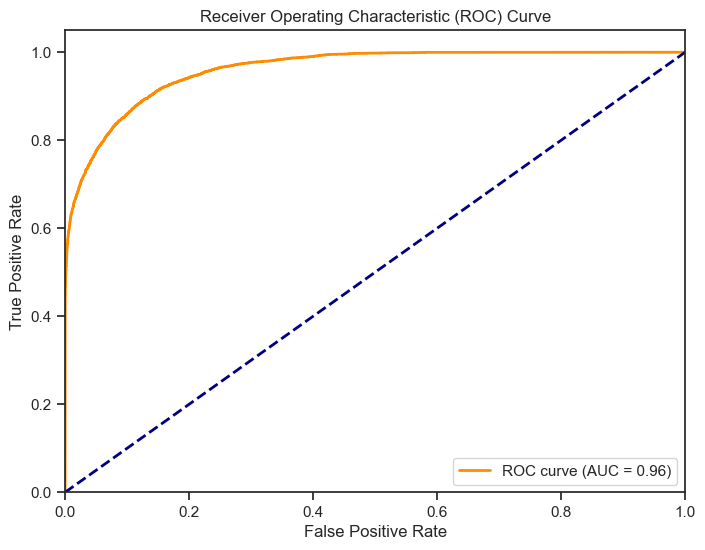

In [181]:

# Plot ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, 
            label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


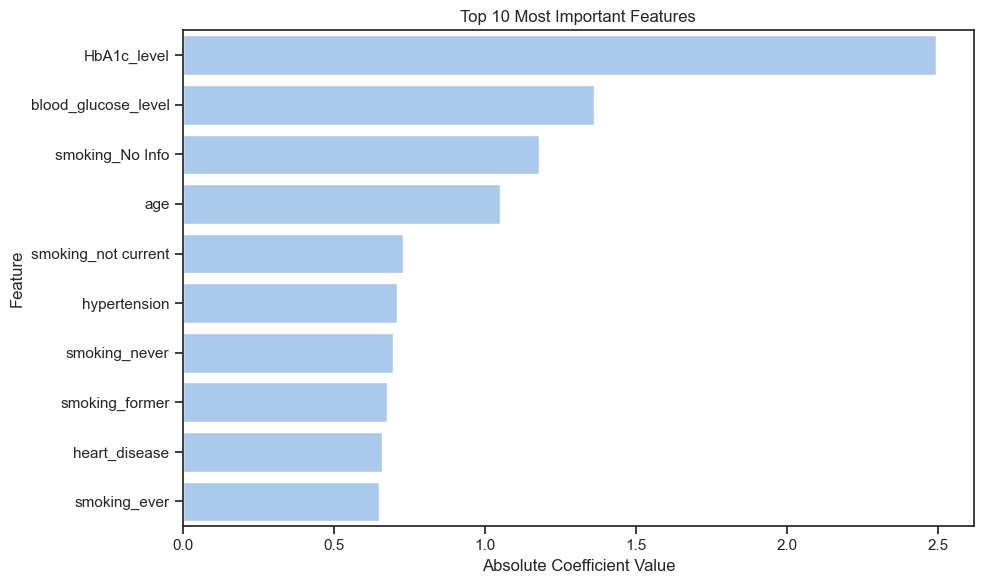

In [182]:

# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature')
plt.title('Top 10 Most Important Features')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()


In [183]:

# Print summary metrics
print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")


Model Performance Metrics:
Accuracy: 0.958
Precision: 0.873
Recall: 0.626
F1 Score: 0.729
ROC AUC: 0.960


Numerical Data Plot

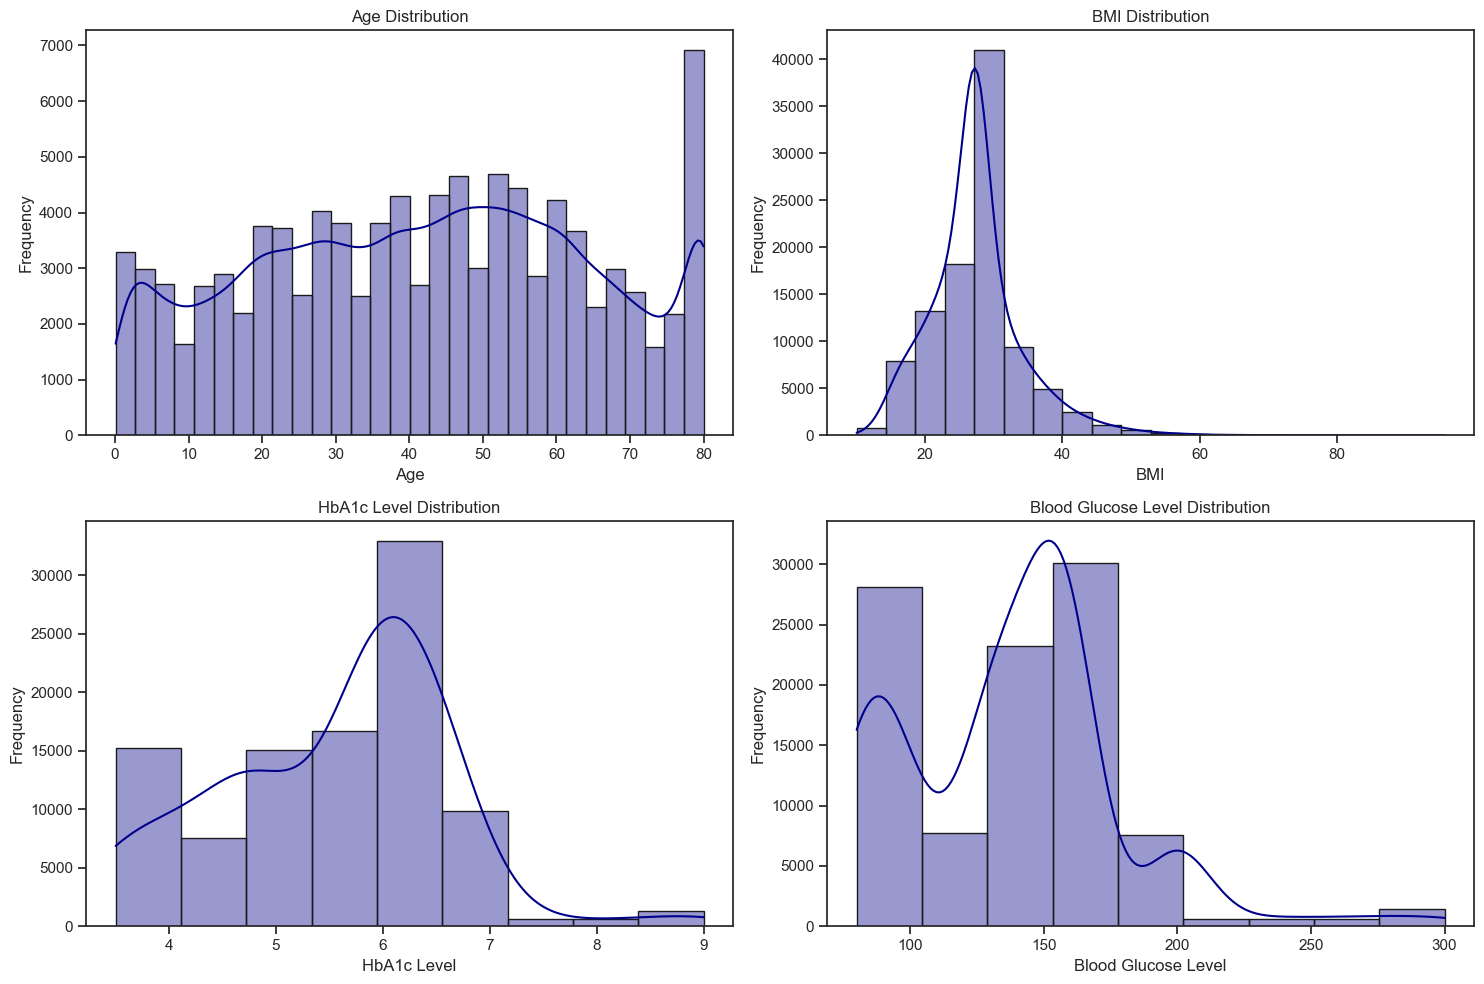

In [184]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot 'age'
sns.histplot(df['age'], bins=30, kde=True, edgecolor='k', alpha=0.4, color='darkblue', kde_kws={'bw_adjust': 1}, ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Frequency')

# Plot 'bmi'
sns.histplot(df['bmi'], bins=20, kde=True, edgecolor='k', alpha=0.4, color='darkblue', kde_kws={'bw_adjust': 3}, ax=axs[0, 1])
axs[0, 1].set_title('BMI Distribution')
axs[0, 1].set_xlabel('BMI')
axs[0, 1].set_ylabel('Frequency')

# Plot 'HbA1c_level'
sns.histplot(df['HbA1c_level'], bins=9, kde=True, edgecolor='k', alpha=0.4, color='darkblue', kde_kws={'bw_adjust': 4}, ax=axs[1, 0])
axs[1, 0].set_title('HbA1c Level Distribution')
axs[1, 0].set_xlabel('HbA1c Level')
axs[1, 0].set_ylabel('Frequency')

# Plot 'blood_glucose_level'
sns.histplot(df['blood_glucose_level'], bins=9, kde=True, edgecolor='k', alpha=0.4, color='darkblue', kde_kws={'bw_adjust': 3}, ax=axs[1, 1])
axs[1, 1].set_title('Blood Glucose Level Distribution')
axs[1, 1].set_xlabel('Blood Glucose Level')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Gaussian Naive Base

In [185]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)

In [186]:

# Summary of the preprocessing
print("Preprocessing Summary:")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print("\nClass distribution:", pd.Series(y_train).value_counts(normalize=True))


Preprocessing Summary:
Training set shape: (47066, 13)
Testing set shape: (47067, 13)

Class distribution: diabetes
0    0.909892
1    0.090108
Name: proportion, dtype: float64


In [187]:
from sklearn.naive_bayes import GaussianNB

#Initialize the model
model = GaussianNB()

In [188]:

# Analyze different k-fold values
results = {
    'k_value': [],
    'mean_accuracy': [],
    'std_accuracy': [],
    'all_scores': []
}

# Calculate dataset size metrics
n_samples = len(X)
min_class_size = min(np.bincount(y))

print(f"Dataset size: {n_samples} samples")
print(f"Minimum class size: {min_class_size} samples")

Dataset size: 94133 samples
Minimum class size: 8482 samples


In [189]:

k_values = list(range(2, 11))

# Perform cross-validation for each k value
for k in k_values:
    cv = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    
    results['k_value'].append(k)
    results['mean_accuracy'].append(scores.mean())
    results['std_accuracy'].append(scores.std())
    results['all_scores'].append(scores)
    
    print(f"\nk={k}:")
    print(f"Mean accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
    print(f"Fold sizes: ~{n_samples // k} samples per fold")



k=2:
Mean accuracy: 0.8997 (+/- 0.0016)
Fold sizes: ~47066 samples per fold

k=3:
Mean accuracy: 0.8998 (+/- 0.0047)
Fold sizes: ~31377 samples per fold

k=4:
Mean accuracy: 0.8998 (+/- 0.0064)
Fold sizes: ~23533 samples per fold

k=5:
Mean accuracy: 0.8999 (+/- 0.0055)
Fold sizes: ~18826 samples per fold

k=6:
Mean accuracy: 0.8999 (+/- 0.0048)
Fold sizes: ~15688 samples per fold

k=7:
Mean accuracy: 0.9000 (+/- 0.0059)
Fold sizes: ~13447 samples per fold

k=8:
Mean accuracy: 0.8999 (+/- 0.0068)
Fold sizes: ~11766 samples per fold

k=9:
Mean accuracy: 0.9000 (+/- 0.0064)
Fold sizes: ~10459 samples per fold

k=10:
Mean accuracy: 0.8998 (+/- 0.0077)
Fold sizes: ~9413 samples per fold


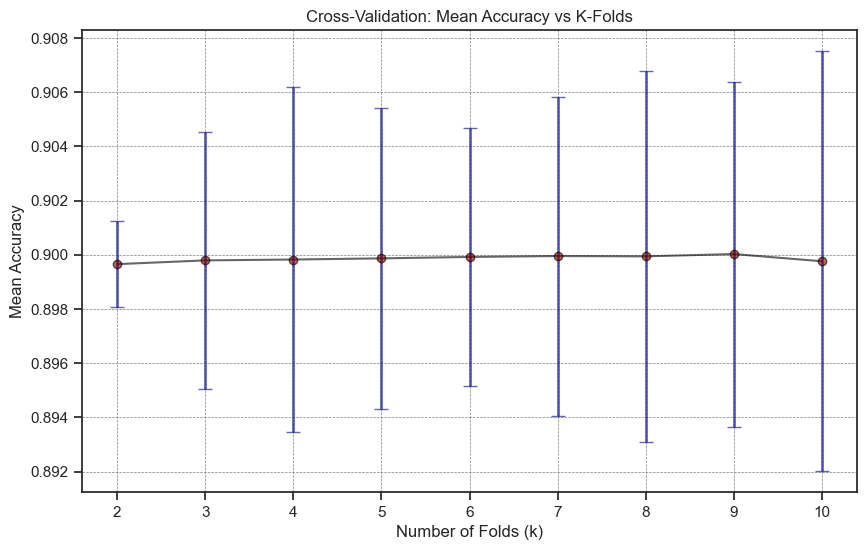

In [190]:
# Plot mean accuracy with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(results['k_value'], results['mean_accuracy'], 
             yerr=[2*std for std in results['std_accuracy']], 
             fmt='o-', capsize=5, color='black', ecolor='darkblue', alpha = 0.6, elinewidth=2, markerfacecolor='darkred')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Mean Accuracy')
plt.title('Cross-Validation: Mean Accuracy vs K-Folds')
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.show()


/var/folders/_g/cgx_xqxd1vlg5wz398x6vc0w0000gn/T/ipykernel_94049/1866283425.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([results['all_scores'][i] for i in range(len(k_values))],


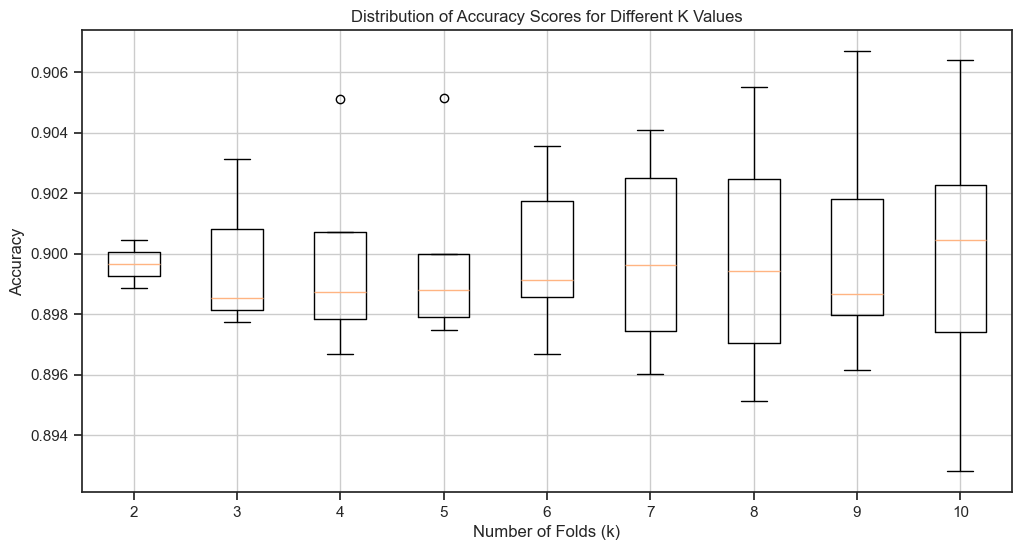

In [191]:

# Plot distribution of scores for each k
plt.figure(figsize=(12, 6))
plt.boxplot([results['all_scores'][i] for i in range(len(k_values))], 
            labels=k_values)
plt.xlabel('Number of Folds (k)')
plt.ylabel('Accuracy')
plt.title('Distribution of Accuracy Scores for Different K Values')
plt.grid(True)
plt.show()

In [192]:

# Find optimal k value
stability_metric = np.array(results['mean_accuracy']) / (np.array(results['std_accuracy']) + 1e-10)
optimal_k_idx = np.argmax(stability_metric)
optimal_k = k_values[optimal_k_idx]

print("\nOptimal k-fold Analysis:")
print(f"Optimal k value: {optimal_k}")
print(f"Mean accuracy: {results['mean_accuracy'][optimal_k_idx]:.4f}")
print(f"Standard deviation: {results['std_accuracy'][optimal_k_idx]:.4f}")


Optimal k-fold Analysis:
Optimal k value: 2
Mean accuracy: 0.8997
Standard deviation: 0.0008


In [193]:
model.fit(X_train, y_train)

GaussianNB()

In [194]:

y_pred = model.predict(X_test)

In [195]:
from sklearn.metrics import roc_auc_score

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.3f}")


Model Performance Metrics:
Accuracy: 0.90
Precision: 0.46
Recall: 0.66
F1-Score: 0.54
ROC AUC: 0.908


In [196]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     42826
           1       0.46      0.66      0.54      4241

    accuracy                           0.90     47067
   macro avg       0.71      0.79      0.74     47067
weighted avg       0.92      0.90      0.91     47067



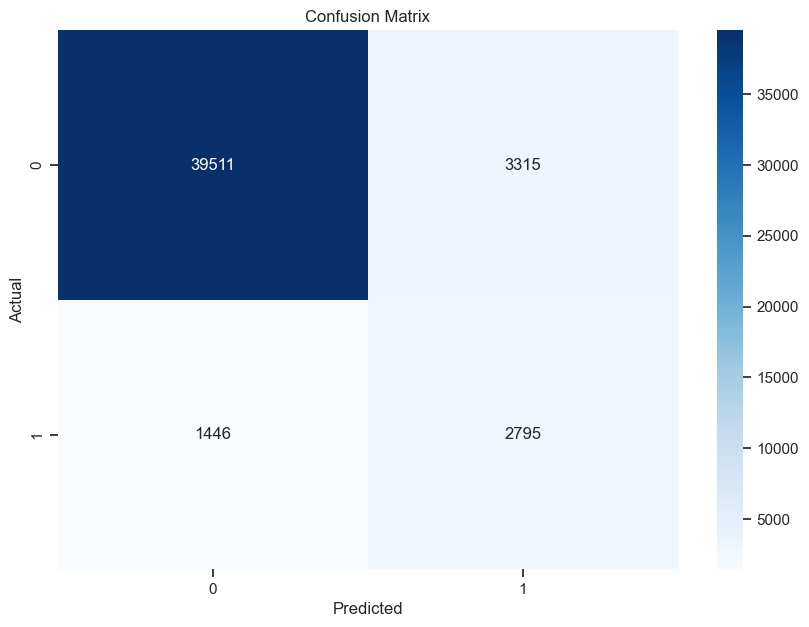

In [197]:

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

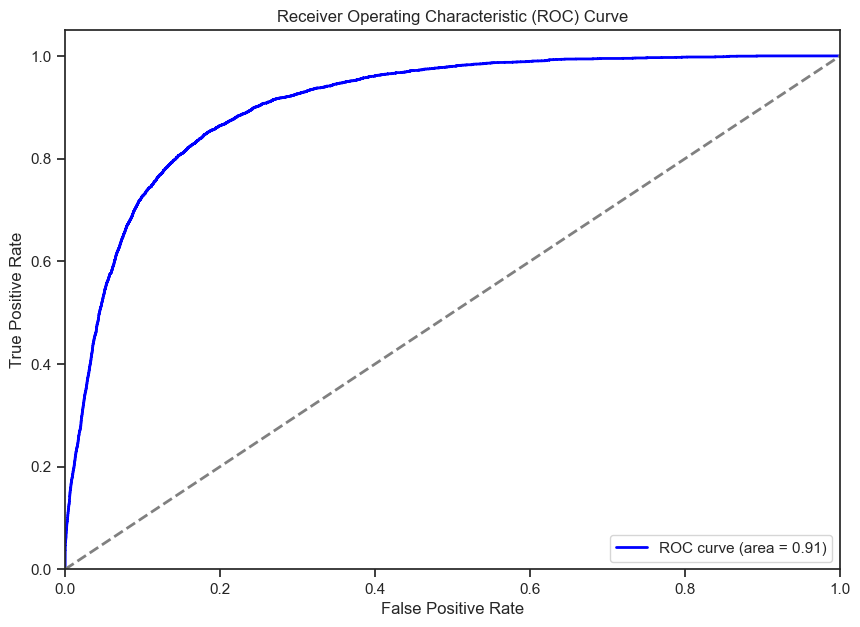

In [198]:

# ROC curve and AUC

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()